In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
%%time
movies = pd.read_csv("./movies.csv")
movies.dropna(inplace = True)
movies.sort_values(by='movieId', inplace = True)
movies.reset_index(inplace = True, drop = True)

ratings = pd.read_csv('./ratings.csv')
ratings.dropna(inplace = True)
ratings.sort_values(by = 'movieId', inplace =True)
ratings.reset_index(inplace = True, drop = True)

Wall time: 20.6 s


In [20]:
movies['year'] = movies.title.str.extract("\((\d{4})\)")
movies.year = pd.to_datetime(movies.year, format = '%Y')
movies.year = movies.year.dt.year
movies.title = movies.title.str[:-7]

In [21]:
%%time
genres_df = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_df = pd.DataFrame(genres_df, columns = ['genre'])
movies = movies.join(movies.genres.str.get_dummies())
movies.drop('genres', inplace = True, axis=1)

Wall time: 1 s


In [22]:
movies.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
%%time
df = ratings[['movieId', 'rating']].groupby('movieId').mean()

Wall time: 1.41 s


In [24]:
genres_df.count()

genre    20
dtype: int64

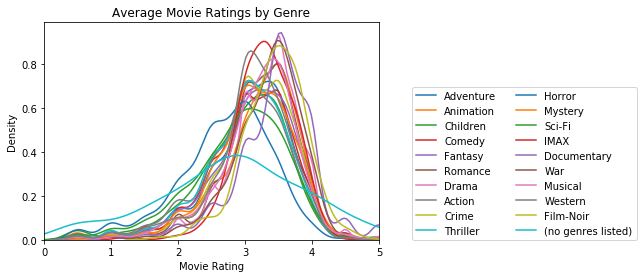

<Figure size 1152x1152 with 0 Axes>

Wall time: 1min 7s


In [25]:
%%time
#fig, axes = plt.subplots(nrows = 5, ncols = 4)
for genre in genres_df.genre:
    df = movies[movies[genre] == True]
    df = ratings[ratings.set_index('movieId').index.isin(df.set_index('movieId').index)]
    df = df[['movieId', 'rating']].groupby('movieId').mean()
    sns.distplot(df.rating, hist = False, kde = True, label = genre)
plt.legend(loc = (1.10,0), ncol = 2)
plt.xlim(0,5)
plt.xlabel('Movie Rating')
plt.ylabel('Density')
plt.title('Average Movie Ratings by Genre')
plt.figure(figsize=(16,16))
plt.show()

We used a density distribution plot in order to get the distribution of the average movie rating per genre. A density plot is a continuous form of a histogram, making it easier to determine distribution since we are not binning the averages together in a bin size of 100 for example. From above, we can see that people are rarely ratings movies lower than a 3 star, which contributes to a right-skewed distributiion. This makes sense since people are more inclined to rate their experience as average if they didn't really enjoy the movie.

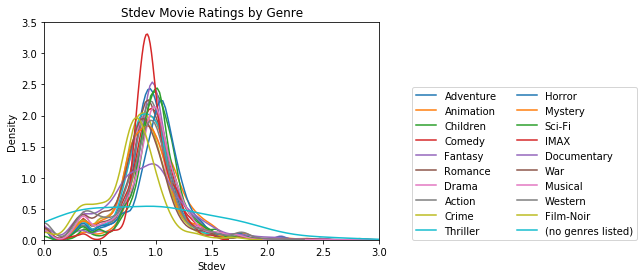

<Figure size 1152x1152 with 0 Axes>

In [26]:
for genre in genres_df.genre:
    df2 = movies[movies[genre] == True]
    df2 = ratings[ratings.set_index('movieId').index.isin(df2.set_index('movieId').index)]
    df2 = df2[['movieId', 'rating']].groupby('movieId').std()
    sns.distplot(df2.rating, hist = False, kde = True, label = genre)
plt.legend(loc = (1.10,0), ncol = 2)
plt.xlim(0,3)
plt.ylim(0,3.5)
plt.xlabel('Stdev')
plt.ylabel('Density')
plt.title('Stdev Movie Ratings by Genre')
plt.figure(figsize=(16,16))
plt.show()

From above, we can see that the standard deviation of all of the different genres are around the same at approx. 1 with density of 2.5. However, there are two notable outliers, 1) (no genres listed), and 2) Comedy. For (no genres listed), we know that these are movies that are outliers to the dataset. Therefore, there aren't as much data availanble for this class than lets say another class. This is why we have a low density across all values of the stdev. For comedy, we see that the stdev is approx. 1 with a density greater than 3. This means that people either typically really likes the comedy movie or they dont. This makes sense in real life as well since everyone's tase in comedy is different despite all of the movies being categorized under one branch.

In [27]:
agg = []
for genre in genres_df.genre:
    df3 = movies[movies[genre] == True]
    df3 = ratings[ratings.set_index('movieId').index.isin(df3.set_index('movieId').index)]
    df3 = df3[['movieId', 'rating']].groupby('movieId').mean()
    mu = df3.rating.mean()
    std = df3.rating.std()
    agg.append((genre, mu, std))

In [28]:
rating_agg = pd.DataFrame(agg, columns = ['genre', 'mean', 'std'])
rating_agg.set_index('genre', inplace = True)

Text(0.5, 1.0, 'Movie Ratings by Genre (Aggregrate Functions)')

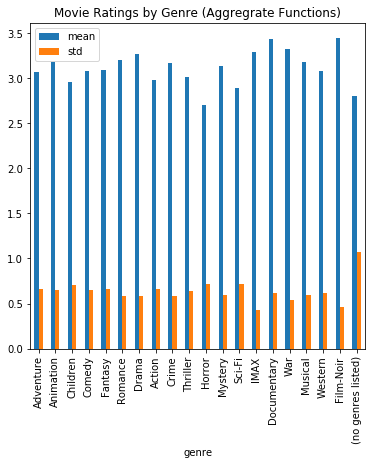

In [29]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)

rating_agg[['mean','std']].plot(kind = 'bar', ax = ax)
plt.title('Movie Ratings by Genre (Aggregrate Functions)')

Above is just the average and standard deviation of the movie ratings for each genre.

In [16]:
user_ratings = ratings[['userId','rating']].groupby('userId').mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

<Figure size 576x576 with 0 Axes>

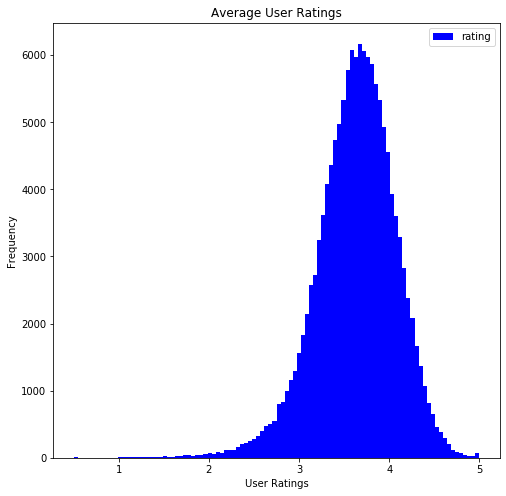

In [17]:
fig = plt.figure(figsize = (8,8))
user_ratings.plot(kind = 'hist', bins = 100, normed = False, figsize = (8,8), color = 'blue')
plt.plot()
plt.xlabel('User Ratings')
plt.title('Average User Ratings')
plt.ylabel('Frequency')

From above, in conjuction with the first figure, we can see that on average, user are rating movies 3's or 4's more frequently than any other rating. This makes sense since people are less inclined to rate movies lower than a 3 if they didn't enjoy the movie. Additionally, we can see the cause of the right-skewed distribution for the average movie ratings per genre. 

In [18]:
ratings_count = ratings[['userId', 'movieId']].groupby('userId').count()

In [19]:
ratings_count.columns = ['count']

Text(0, 0.5, 'Log Frequency')

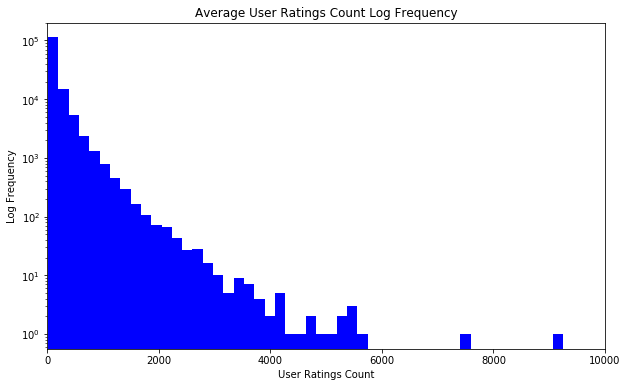

In [20]:
plt.figure(figsize = (10,6))
plt.hist(ratings_count['count'], bins = 50, color = 'blue',log = True)
plt.xlim(0,10000)
plt.title('Average User Ratings Count Log Frequency')
plt.xlabel('User Ratings Count')
plt.ylabel('Log Frequency')

Let's look at the most popular movies. We are going to find movies that were rated atleast 25000 times.

In [30]:
from IPython.display import display, HTML

In [36]:
df4 = ratings[['userId', 'movieId']].groupby('movieId').count()
df4.columns = ['ratings_count']
print(display(HTML((movies.set_index('movieId').loc[df4.index[df4['ratings_count'] >= 25000]]['title']).to_frame()[0:10].to_html())))

,title
movieId,
1,Toy Story
10,GoldenEye
32,Twelve Monkeys (a.k.a. 12 Monkeys)
34,Babe
39,Clueless
47,Seven (a.k.a. Se7en)
50,"Usual Suspects, The"
110,Braveheart
150,Apollo 13


None


In [22]:
df5 = ratings.set_index('movieId').loc[df4.index[df4['ratings_count'] >= 25000]].groupby('movieId').mean()

Text(0.5, 1.0, 'Average Movie Rating for Highly Rated Movies')

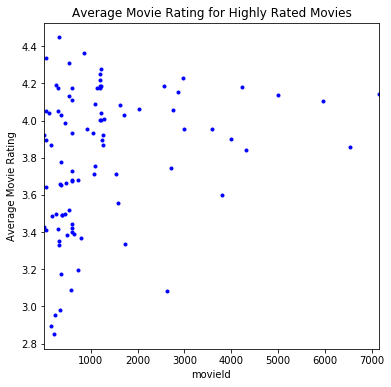

In [23]:
df5.rating.plot(style = 'b.', figsize = (6,6))
plt.plot()
plt.ylabel("Average Movie Rating")
plt.title('Average Movie Rating for Highly Rated Movies')

In [24]:
highest_rated_title = movies.set_index('movieId').loc[df5['rating'].idxmax].title

In [25]:
print(highest_rated_title)

Shawshank Redemption, The


## From EDA 1

In [26]:
movies = pd.read_csv("./movies.csv")
movies.dropna(inplace = True)
#movies = movies.drop(columns = 'genres', axis = 1)

ratings = pd.read_csv('./ratings.csv')
ratings.dropna(inplace = True)
ratings = ratings.drop(columns = 'timestamp', axis = 1)

In [27]:
print("For movies:\n", movies.isna().sum())
print("\n For ratings:\n", ratings.isna().sum())

For movies:
 movieId    0
title      0
genres     0
dtype: int64

 For ratings:
 userId     0
movieId    0
rating     0
dtype: int64


In [28]:
%%time
movies.genres = movies.genres.str.split('|')

Wall time: 29.7 ms


In [29]:
%%time
genre_list = []
for list in movies.genres:
    for category in list:
        if (category not in genre_list):
            genre_list.append(category)

Wall time: 40.5 ms


In [30]:
%%time
print(sorted(genre_list))
genre_list = sorted(genre_list)

for genre in genre_list:
    movies[genre] = 0

['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
Wall time: 38.6 ms


In [31]:
%%time
for i in range (movies.shape[0]):
    for category in genre_list:
        if (category in movies['genres'].iloc[i]):
            movies.loc[i,category] = 1

Wall time: 2min 8s


In [32]:
print(movies.shape)
movies.head()
movies = movies.drop('genres', axis = 1)
movies.head()

(27278, 23)


,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test = movies.iloc[:,2:22].sum()
print(test)

(no genres listed)      246
Action                 3520
Adventure              2329
Animation              1027
Children               1139
Comedy                 8374
Crime                  2939
Documentary            2471
Drama                 13344
Fantasy                1412
Film-Noir               330
Horror                 2611
IMAX                    196
Musical                1036
Mystery                1514
Romance                4127
Sci-Fi                 1743
Thriller               4178
War                    1194
Western                 676
dtype: int64


In [34]:
movies['year'] = movies['title'].str[-5:].replace(to_replace = ' ', value = '') ## Gets the 'year)' a movie was made
movies['year'] = movies['year'].str[0:4] ## Strips it down to 'year'
## Converts year into int/float and if there is any errors, set them to NaN
movies.year = pd.to_numeric(movies.year, errors = 'coerce') 

In [35]:
movies = movies.dropna()
print(movies.shape)
movies.sample(n=5)

(27050, 23)


,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
22258,107055,"Dead Pit, The (1989)",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1989.0
6498,6608,Sex & the Other Man (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1996.0
7068,7180,Odds Against Tomorrow (1959),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1959.0
16263,82129,"Passionate Friends, The (a.k.a. One Woman's St...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1949.0
24445,115821,Shakespeare's Globe: Henry V (2013),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2013.0


In [36]:
print(type(pd.to_numeric(test)))
print(type(test.to_numpy().reshape(20,)[0]))
# genre_sum = np.hstack((np.asarray(genre_list).reshape(20,1), test.to_numpy().reshape(20,)))
# genre_sum[:,1] = genre_sum[:,1].astype('int64')

test2 = test.to_numpy().reshape(20,)

<class 'pandas.core.series.Series'>
<class 'numpy.int64'>


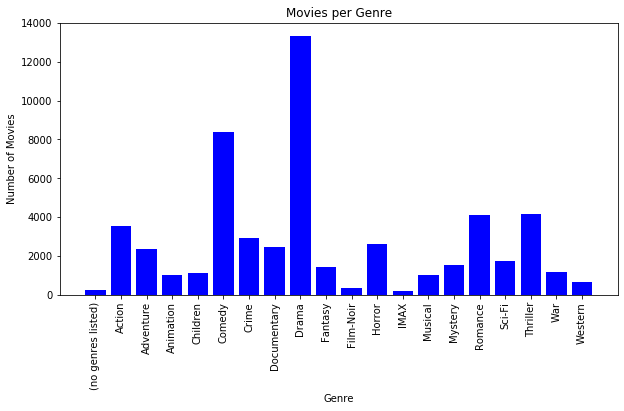

In [37]:
x = np.arange(20)

plt.figure(figsize = (10,5))
plt.bar(x, test2, color = 'b')
plt.xticks(x, genre_list, rotation = 'vertical')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Movies per Genre')
plt.show()

In [40]:
from surprise import SVD, SVDpp
from surprise import rmse 

ModuleNotFoundError: No module named 'surprise'